<a href="https://colab.research.google.com/github/asengardeon/aprendizado_de_maquina/blob/master/Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from matplotlib.cbook import boxplot_stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


In [89]:
df_cars = pd.read_csv('carros.csv', sep=',', decimal='.')
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,dealer,Manual,0


In [90]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [91]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


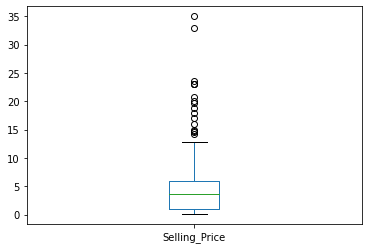

In [92]:
df_cars.Selling_Price.plot.box()

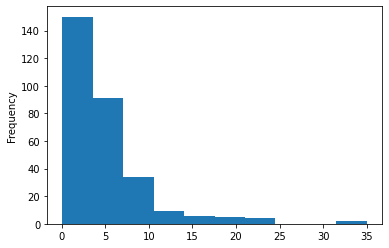

In [93]:
df_cars.Selling_Price.plot.hist()

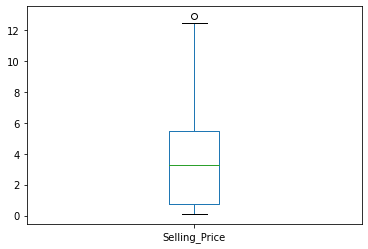

In [94]:
stats = boxplot_stats(df_cars.Selling_Price)[0]

df_cars = df_cars[df_cars.Selling_Price <= stats['whishi']]
df_cars.Selling_Price.plot.box()

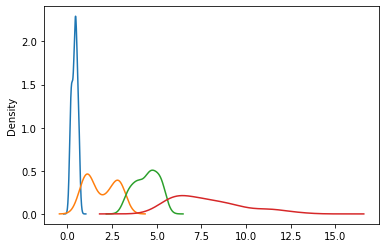

In [95]:
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_cars = df_cars.assign(price_discretized = discretizer.fit_transform(df_cars.Selling_Price.values.reshape(-1, 1)))
df_cars.head()
[ df_cars[df_cars.price_discretized == i].Selling_Price.plot.density() for i in range(4) ]

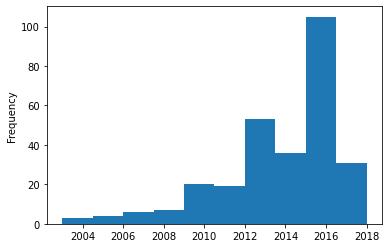

In [96]:
df_cars.Year.plot.hist()

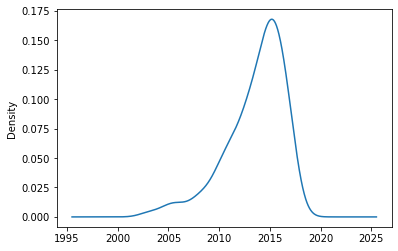

In [97]:
df_cars.Year.plot.density()

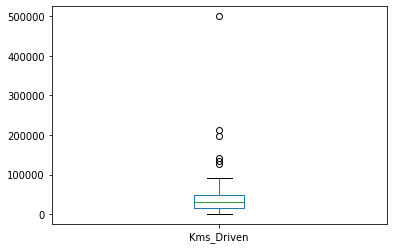

In [98]:
df_cars.Kms_Driven.plot.box()

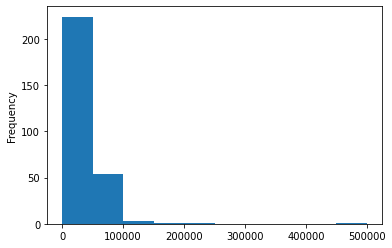

In [99]:
df_cars.Kms_Driven.plot.hist()

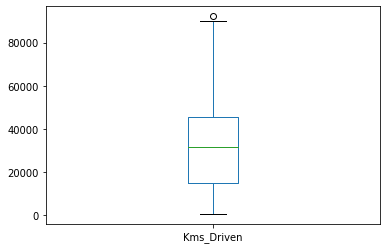

In [100]:
stats = boxplot_stats(df_cars.Kms_Driven)[0]

df_cars = df_cars[df_cars.Kms_Driven <= stats['whishi']]
df_cars.Kms_Driven.plot.box()

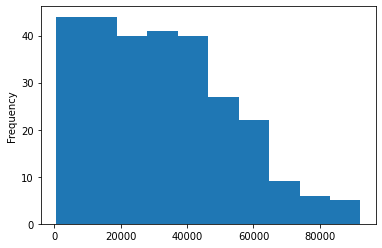

In [101]:
df_cars.Kms_Driven.plot.hist()

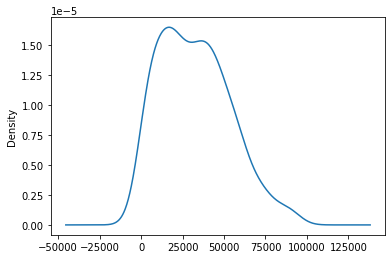

In [102]:
df_cars.Kms_Driven.plot.density()

In [103]:
df_cars.Fuel_Type.value_counts()

Petrol    206
Diesel     38
Petro      25
diesel      7
CNG         2
Name: Fuel_Type, dtype: int64

In [104]:
def adjust_fuel_type(fuel: str) -> str:
    if fuel == 'Petro':
        return 'Petrol'
    elif fuel == 'diesel':
        return 'Diesel'
    else:
        return fuel
    

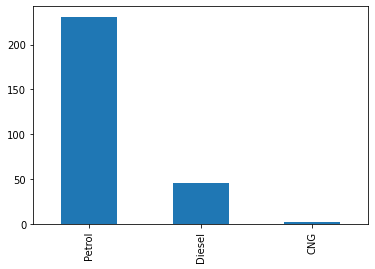

In [105]:
df_cars.Fuel_Type = df_cars.Fuel_Type.apply(adjust_fuel_type)
df_cars.Fuel_Type.value_counts().plot.bar()

In [106]:
df_cars.Fuel_Type.value_counts()

Petrol    231
Diesel     45
CNG         2
Name: Fuel_Type, dtype: int64

In [107]:
df_cars.Seller_Type.value_counts()

Dealer        132
Individual     56
dealer         45
individual     45
Name: Seller_Type, dtype: int64

In [108]:
def adjust_seller_type(seller: str)->str:
    if seller == 'individual':
        return 'Individual'
    elif seller == 'dealer':
        return 'Dealer'
    else:
        return seller

In [109]:
df_cars.Seller_Type = df_cars.Seller_Type.apply(adjust_seller_type)
df_cars.Seller_Type.value_counts()


Dealer        177
Individual    101
Name: Seller_Type, dtype: int64

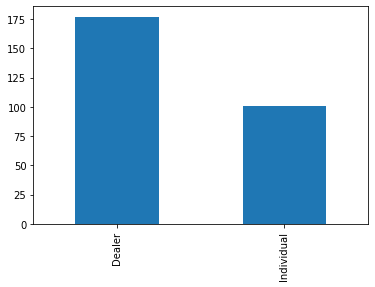

In [110]:
df_cars.Seller_Type.value_counts().plot.bar()

In [111]:
df_cars.Transmission.value_counts()

Manual       203
manual        51
automatic     12
Automatic     12
Name: Transmission, dtype: int64

In [112]:
def adjust_transmission_type(transmission: str) -> str:
    if transmission == 'manual':
        return 'Manual'
    elif transmission == 'automatic':
        return 'Automatic'
    else:
        return transmission
    

In [113]:
df_cars.Transmission = df_cars.Transmission.apply(adjust_transmission_type)
df_cars.Transmission.value_counts()


Manual       254
Automatic     24
Name: Transmission, dtype: int64

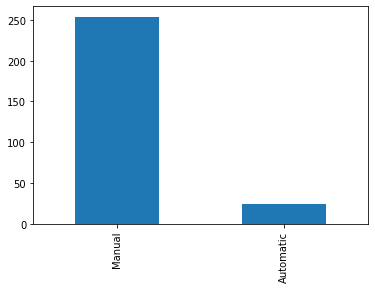

In [114]:
df_cars.Transmission.value_counts().plot.bar()

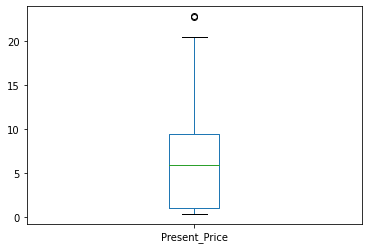

In [115]:
df_cars.Present_Price.plot.box()

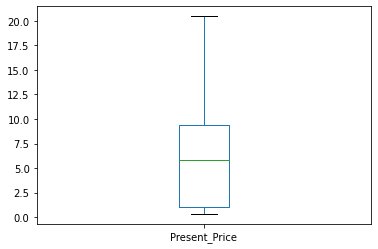

In [116]:
stats = boxplot_stats(df_cars.Present_Price)[0]

df_cars = df_cars[df_cars.Present_Price <= stats['whishi']]
df_cars.Present_Price.plot.box()

In [117]:
df_cars.count()


Car_Name             276
Year                 276
Selling_Price        276
Present_Price        276
Kms_Driven           276
Fuel_Type            276
Seller_Type          276
Transmission         276
Owner                276
price_discretized    276
dtype: int64

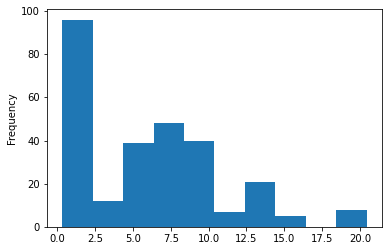

In [118]:
df_cars.Present_Price.plot.hist()

####  Na avaliação abaixo podemos verificar que os preços são  menores  para compras com particulares 


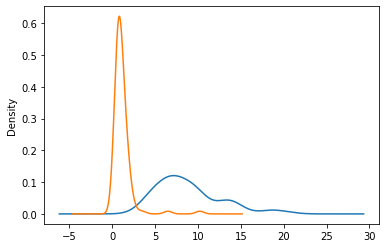

In [119]:
df_cars.Present_Price[df_cars.Seller_Type == 'Dealer'].plot.density() #Laranja
df_cars.Present_Price[df_cars.Seller_Type == 'Individual'].plot.density()#Azul     

####  Na avaliação abaixo podemos verificar que apesar a diferença de valores , o comportamento do preço com relação a transmissão é a mesma


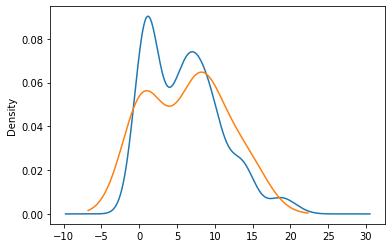

In [120]:
df_cars.Present_Price[df_cars.Transmission == 'Manual'].plot.density()#Laranja   
df_cars.Present_Price[df_cars.Transmission != 'Manual'].plot.density()#Azul  

In [121]:
####PAra ocmbustivel o valor muda  conforme o tipode combustivel

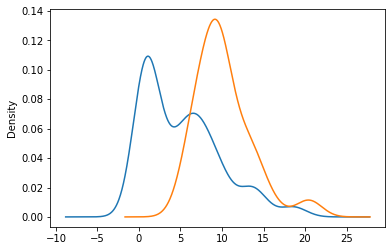

In [122]:
df_cars.Present_Price[df_cars.Fuel_Type == 'Petrol'].plot.density()#Laranja   
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'].plot.density()#Azul  

In [123]:
df_cars.Year.value_counts()

2015    58
2016    47
2014    36
2013    32
2017    30
2012    21
2011    19
2010    12
2009     6
2008     5
2006     3
2005     3
2007     2
2018     1
2003     1
Name: Year, dtype: int64

In [143]:
#Removo os anos que tem como contador apenas um

df_cars = df_cars[df_cars.Year != 2018]
df_cars = df_cars[df_cars.Year != 2003]
df_cars.Year.value_counts()

2015    58
2016    47
2014    36
2013    32
2017    30
2012    21
2011    19
2010    12
2009     6
2008     5
2006     3
2005     3
2007     2
Name: Year, dtype: int64

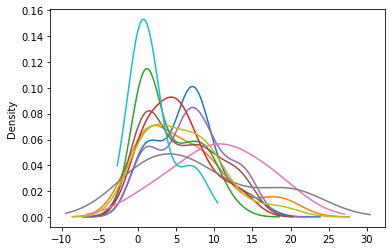

In [125]:
# Para os preços com amostragem menor que 3 distrocem os valores por haver poca amostra, então é  interessante remover  estes items
for c in df_cars.Year.unique(): 
    if df_cars.Year.value_counts()[c] > 3:
        df_cars.Present_Price[df_cars.Year == c].plot.density()  


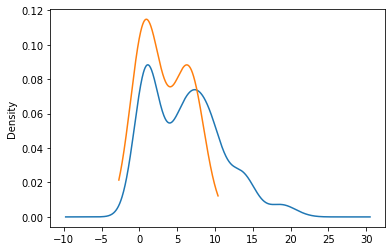

In [126]:
df_cars.Present_Price[df_cars.Owner == 0].plot.density()
df_cars.Present_Price[df_cars.Owner == 1].plot.density()

#### Podemos verificar que para o emsmo  ano o valor muda conforme o tipo  de combustivel

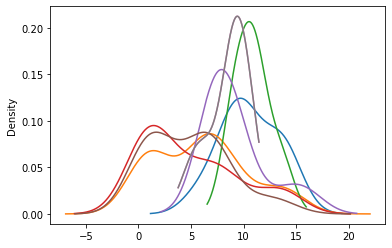

In [127]:
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'][df_cars.Year == 2015].plot.density()#Laranja  
df_cars.Present_Price[df_cars.Fuel_Type == 'Petrol'][df_cars.Year == 2015].plot.density()#Azul  
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'][df_cars.Year == 2016].plot.density()#Verde  
df_cars.Present_Price[df_cars.Fuel_Type == 'Petrol'][df_cars.Year == 2016].plot.density()#Vermelho  
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'][df_cars.Year == 2014].plot.density()#Lilas  
df_cars.Present_Price[df_cars.Fuel_Type == 'Petrol'][df_cars.Year == 2014].plot.density()#Marrom  
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'][df_cars.Year == 2013].plot.density()#Rosa 
df_cars.Present_Price[df_cars.Fuel_Type == 'Diesel'][df_cars.Year == 2013].plot.density()#Rosa

In [128]:
df_cars = df_cars.assign(year_fuel = df_cars.apply(lambda x: '{}_{}'.format(x.Year, x.Fuel_Type), axis=1))

In [129]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,price_discretized,year_fuel
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.0,2014_Petrol
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.0,2013_Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3.0,2017_Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.0,2011_Petrol
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.0,2014_Diesel


In [130]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,price_discretized
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,2013.750000,3.754928,6.011848,32120.913043,0.036232,1.543478
std,2.681757,3.067865,4.801373,20722.825248,0.187206,1.128923
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.750000,0.990000,15000.000000,0.000000,1.000000
50%,2014.000000,3.300000,5.835000,31213.500000,0.000000,2.000000
75%,2016.000000,5.675000,9.400000,45128.500000,0.000000,3.000000
max,2018.000000,12.900000,20.450000,92233.000000,1.000000,3.000000


In [144]:
df_cars.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,price_discretized
Year,1.000000,0.262513,-0.047475,-0.572450,-0.133071,0.254002
Selling_Price,0.262513,1.000000,0.864032,0.174966,-0.112818,0.916653
Present_Price,-0.047475,0.864032,1.000000,0.422975,-0.108382,0.843346
Kms_Driven,-0.572450,0.174966,0.422975,1.000000,-0.008381,0.193019
Owner,-0.133071,-0.112818,-0.108382,-0.008381,1.000000,-0.110542
price_discretized,0.254002,0.916653,0.843346,0.193019,-0.110542,1.000000


In [163]:
#Variaveis globais dos modelos
k = 5
algs = ['linear_regression', 'lasso_regression']

In [160]:
def build_features(df_train, df_test):
    categories = list(df_cars.year_fuel.unique())#Necessário pois no treino pode haver categorias defirentes do teste
    #ohe_year_fuel = OneHotEncoder(sparse=False, categories=[categories])
    ohe_year_fuel = OneHotEncoder(sparse=False, handle_unknown='ignore')
    x_train_ohe = ohe_year_fuel.fit_transform(df_train[['year_fuel']])
    x_test_ohe = ohe_year_fuel.transform(df_test[['year_fuel']])

    mms = MinMaxScaler()
    x_train_quant = mms.fit_transform(df_train[['Present_Price']])
    x_test_quant = mms.transform(df_test[['Present_Price']])
    x_train = np.hstack([x_train_ohe, x_train_quant])
    x_test = np.hstack([x_test_ohe, x_test_quant])

    y_train = df_train.Selling_Price.values.reshape(-1, 1)
    y_test = df_test.Selling_Price.values.reshape(-1, 1)

    return x_train, y_train, x_test, y_test


In [161]:
def build_models(alg):
    model = None
    if alg == 'linear_regression':
        model = LinearRegression()
    elif alg == 'lasso_regression':
        model = GridSearchCV(
            Lasso(normalize=True),
            param_grid={
                'alpha': np.linspace(0, 5, num=50)
            },
            scoring='neg_mean_absolute_error',
            n_jobs=-1,
            cv = KFold(n_splits=k, shuffle=True)
        )
    return model     

In [165]:
cv = KFold(n_splits=k, shuffle=True)
mean_mae = np.zeros(shape=(len(algs), k, 2))
mean_r2 = np.zeros(shape=(len(algs), k, 2))
for alg_index, alg in enumerate(algs):
    for fold, (train, test) in enumerate(cv.split(df_cars)):
        df_train = df_cars.iloc[train]
        df_test = df_cars.iloc[test]

        # computar as features
        x_train, y_train, x_test, y_test = build_features(df_train, df_test)
        
        # treinar o modelo
        model = build_models(alg)
        model.fit(x_train, y_train)
        
        # coletar os resultados
        y_pred_train = model.predict(x_train)
        mean_mae[alg_index, fold, 0] = mean_absolute_error(y_train, y_pred_train)
        mean_r2[alg_index, fold, 0] = r2_score(y_train, y_pred_train)

        y_pred_test = model.predict(x_test)
        mean_mae[alg_index, fold, 1] = mean_absolute_error(y_test, y_pred_test)
        mean_r2[alg_index, fold, 1] = r2_score(y_test, y_pred_test)

    # apresentar os resultados
    print('-' * 50)
    print('Algoritmo:', alg)
    print('-' * 50)
    print('Treino - Média MAE: ', mean_mae[alg_index, :,0].mean())
    print('Teste - Média MAE: ', mean_mae[alg_index, :,1].mean())
    print('-' * 50)
    print('Treino - Média R2: ', mean_r2[alg_index, :,0].mean())
    print('Teste - Média R2: ', mean_r2[alg_index, :,1].mean())
    print()


--------------------------------------------------
Algoritmo: linear_regression
--------------------------------------------------
Treino - Média MAE:  0.7754009707164001
Teste - Média MAE:  897742528977.1101
--------------------------------------------------
Treino - Média R2:  0.886162373437996
Teste - Média R2:  -6.041108577159574e+24



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.79594127203444, tolerance: 0.20815565296803654
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-package

--------------------------------------------------
Algoritmo: lasso_regression
--------------------------------------------------
Treino - Média MAE:  0.7739117923175602
Teste - Média MAE:  0.8693544396608397
--------------------------------------------------
Treino - Média R2:  0.8859186124804708
Teste - Média R2:  0.847962090244281



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.85731705550697, tolerance: 0.19563433709090916
  positive)
